**آمار توصیفی**

1-
```
data = {
    'Date':
    'Crypto_ID': (or Name)
    'Market_Cap':
    'Volume_24h':
}
```
2- I have no idea rn

3-


```
cryptocurrencies_data = pd.DataFrame({
    'Cryptocurrency':
    'TradingVolume':
})
```

4-
I need PriceChange and Cryptocurrency

5- I have no idea rn

**آزمون فرض**


1-

```
crypto_data = {
    "PriceChange":
    "DayOfWeek": np.random.choice(["Wednesday", "Thursday", "Friday", "Saturday", "Sunday", "Monday", "Tuesday"], size=num_days),
}
```

2-


```
crypto_data = {
    "Cryptocurrency":
    "TradingVolume":
}
```




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# آمار توصیفی


Part 1

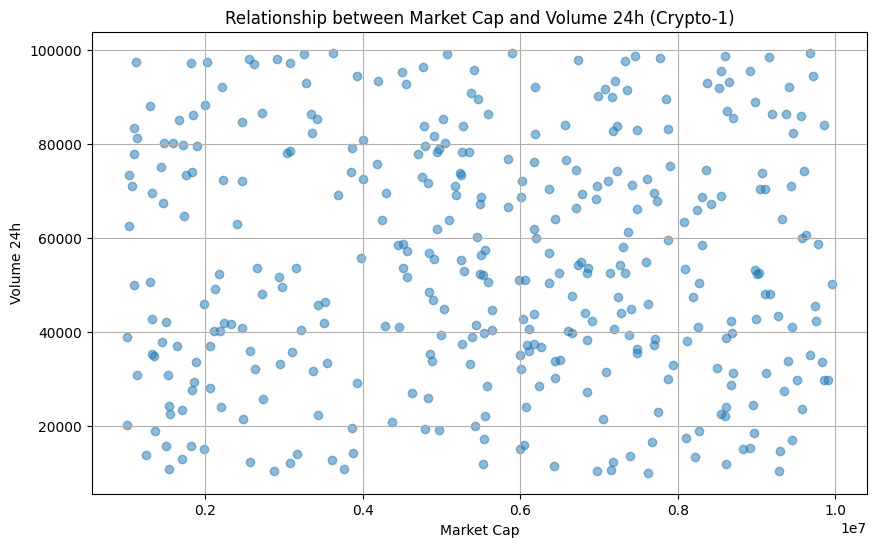

In [ ]:
# Generate fake data for demonstration
np.random.seed(0)
n_days = 365  # Assuming one year of data
n_cryptos = 100  # Number of cryptocurrencies

# Generate random dates for one year
dates = pd.date_range(start='2022-09-01', periods=n_days, freq='D')

# Generate random cryptocurrency IDs or Symbols
crypto_ids = [f'Crypto-{i}' for i in range(1, n_cryptos + 1)]

# Generate random Market Cap and Volume 24h data
market_cap = np.random.randint(1_000_000, 10_000_000, size=(n_days, n_cryptos))
volume_24h = np.random.randint(10_000, 100_000, size=(n_days, n_cryptos))

# Create a DataFrame
data = {
    'Date': np.repeat(dates, n_cryptos),
    'Crypto_ID': np.tile(crypto_ids, n_days),
    'Market_Cap': market_cap.flatten(),
    'Volume_24h': volume_24h.flatten()
}
df = pd.DataFrame(data)

# Select a single cryptocurrency for demonstration
crypto_to_plot = 'Crypto-1'
selected_data = df[df['Crypto_ID'] == crypto_to_plot]

# Create a scatter plot to check the relationship between Market Cap and Volume 24h
plt.figure(figsize=(10, 6))
plt.scatter(selected_data['Market_Cap'], selected_data['Volume_24h'], alpha=0.5)
plt.title(f'Relationship between Market Cap and Volume 24h ({crypto_to_plot})')
plt.xlabel('Market Cap')
plt.ylabel('Volume 24h')
plt.grid(True)
plt.show()

Part 2

In [ ]:
# Sample data (replace with your actual data)
np.random.seed(0)
num_days = 365
cryptocurrencies = ["BTC", "ETH", "XRP", "LTC", "ADA"]  # Replace with your cryptocurrency symbols
pairs = [(crypto1, crypto2) for crypto1 in cryptocurrencies for crypto2 in cryptocurrencies if crypto1 < crypto2]

data = {
    "Date": pd.date_range(start="2022-09-01", periods=num_days, freq="D"),
    **{f"{pair[0]}_to_{pair[1]}": np.random.choice([-1, 0, 1], size=num_days) for pair in pairs}
}

df = pd.DataFrame(data)

# Calculate the number of aligned days for each pair
aligned_days = df.iloc[:, 1:].apply(lambda row: sum(row != 0), axis=0)

# Sort pairs by the number of aligned days in descending order
sorted_pairs = sorted(zip(pairs, aligned_days), key=lambda x: x[1], reverse=True)

# Display the top 30 pairs
top_30_pairs = sorted_pairs[:30]

# Print the results
print("Top 30 cryptocurrency pairs with the most days of price changes in the last year:")
for pair, days in top_30_pairs:
    print(f"Pair: {pair[0]} to {pair[1]}, Aligned Days: {days}")

Top 30 cryptocurrency pairs with the most days of price changes in the last year:
Pair: ADA to LTC, Aligned Days: 251
Pair: ETH to XRP, Aligned Days: 247
Pair: ADA to ETH, Aligned Days: 247
Pair: ADA to BTC, Aligned Days: 245
Pair: BTC to ETH, Aligned Days: 241
Pair: BTC to XRP, Aligned Days: 241
Pair: ADA to XRP, Aligned Days: 240
Pair: BTC to LTC, Aligned Days: 237
Pair: ETH to LTC, Aligned Days: 236
Pair: LTC to XRP, Aligned Days: 234


Part 3

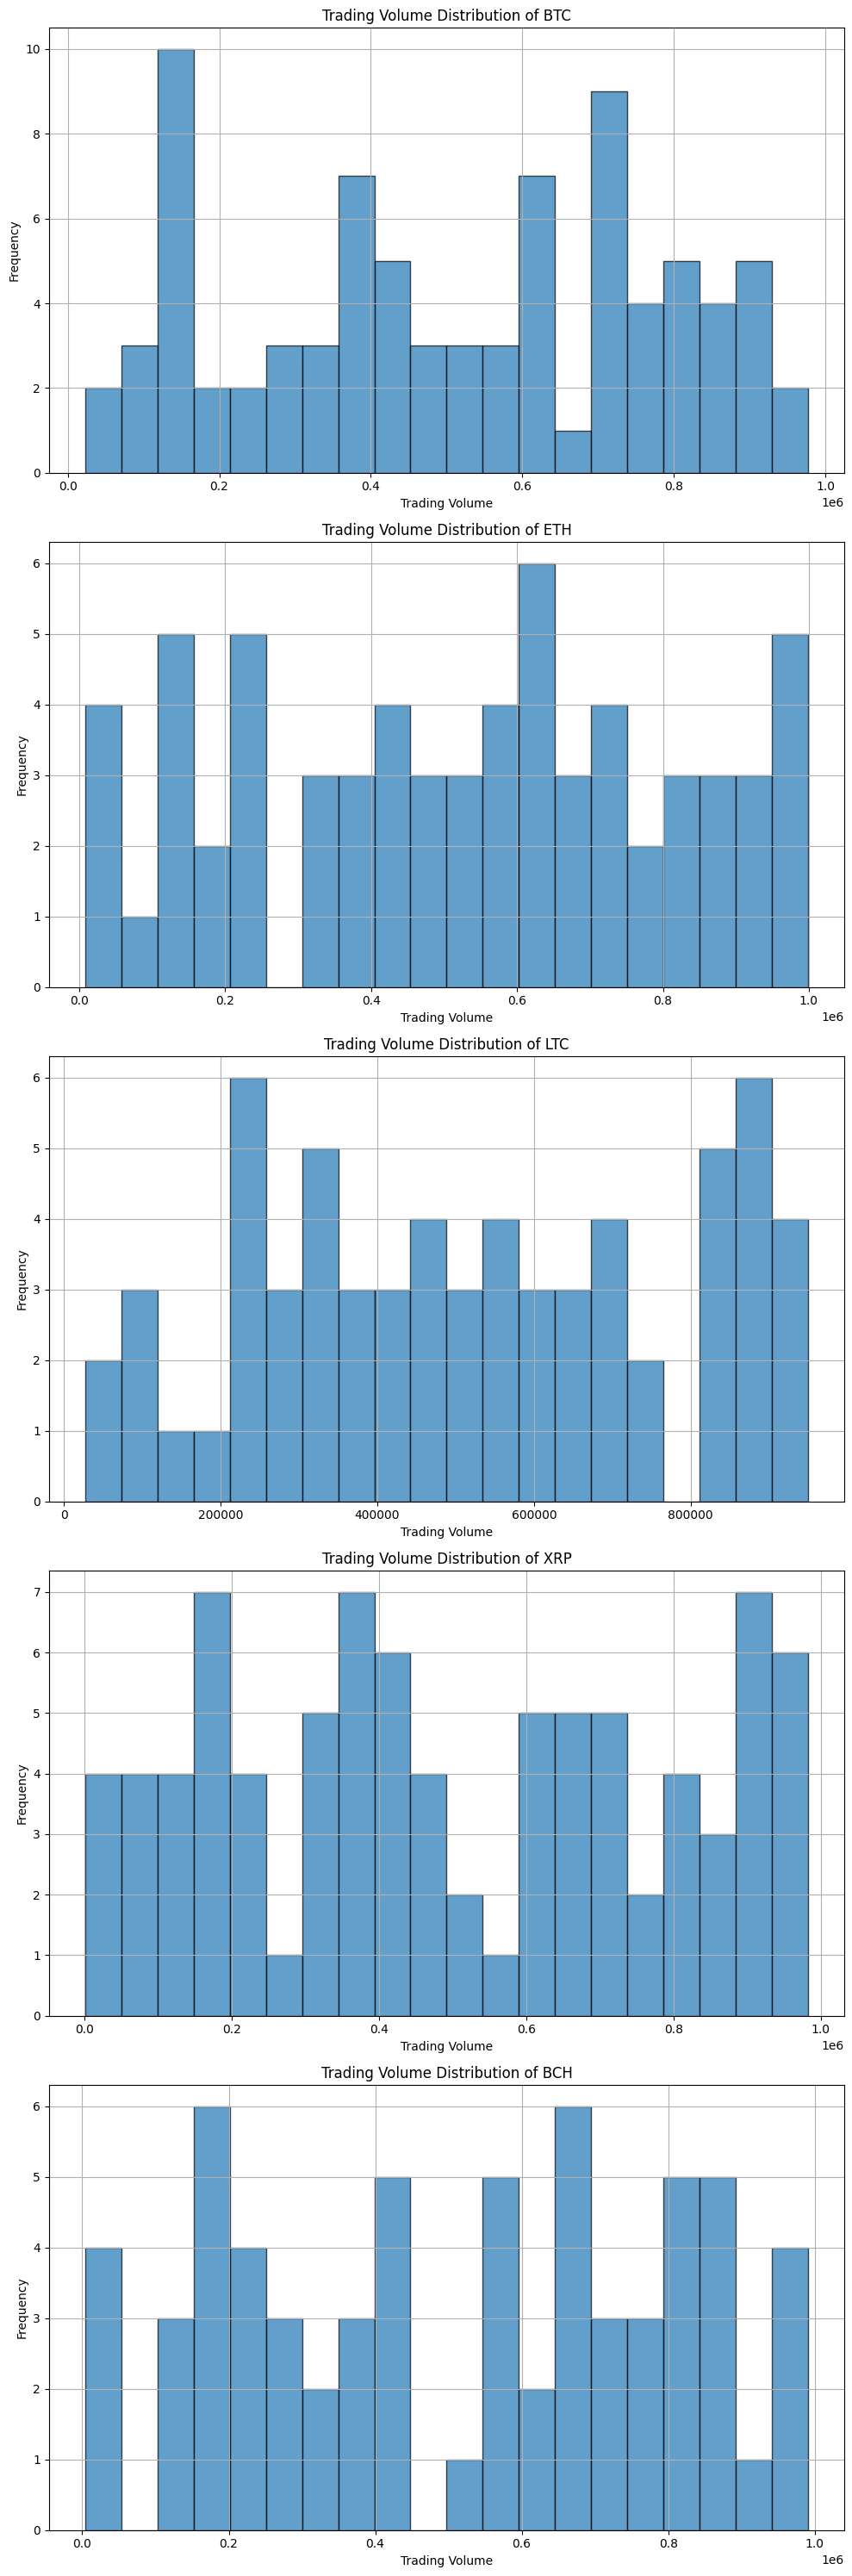

In [ ]:
# Sample data (replace with your actual data)
np.random.seed(0)
num_days = 365
cryptocurrencies = ["BTC", "ETH", "LTC", "XRP", "BCH"]  # Replace with your cryptocurrency symbols

data = {
    "Cryptocurrency": np.random.choice(cryptocurrencies, num_days),
    "Date": pd.date_range(start="2023-01-01", periods=num_days, freq="D"),
    "Trading Volume": np.random.randint(1, 1000, size=num_days) * 1e3  # Replace with daily trading volumes
}

df = pd.DataFrame(data)

# Create subplots for each cryptocurrency
fig, axes = plt.subplots(nrows=len(cryptocurrencies), figsize=(10, 6 * len(cryptocurrencies)))

for i, crypto in enumerate(cryptocurrencies):
    filtered_df = df[df["Cryptocurrency"] == crypto]
    axes[i].hist(filtered_df["Trading Volume"], bins=20, edgecolor="k", alpha=0.7)
    axes[i].set_title(f"Trading Volume Distribution of {crypto}")
    axes[i].set_xlabel("Trading Volume")
    axes[i].set_ylabel("Frequency")
    axes[i].grid(True)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

Part 4

<ipython-input-21-844347bc7a97>:18: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


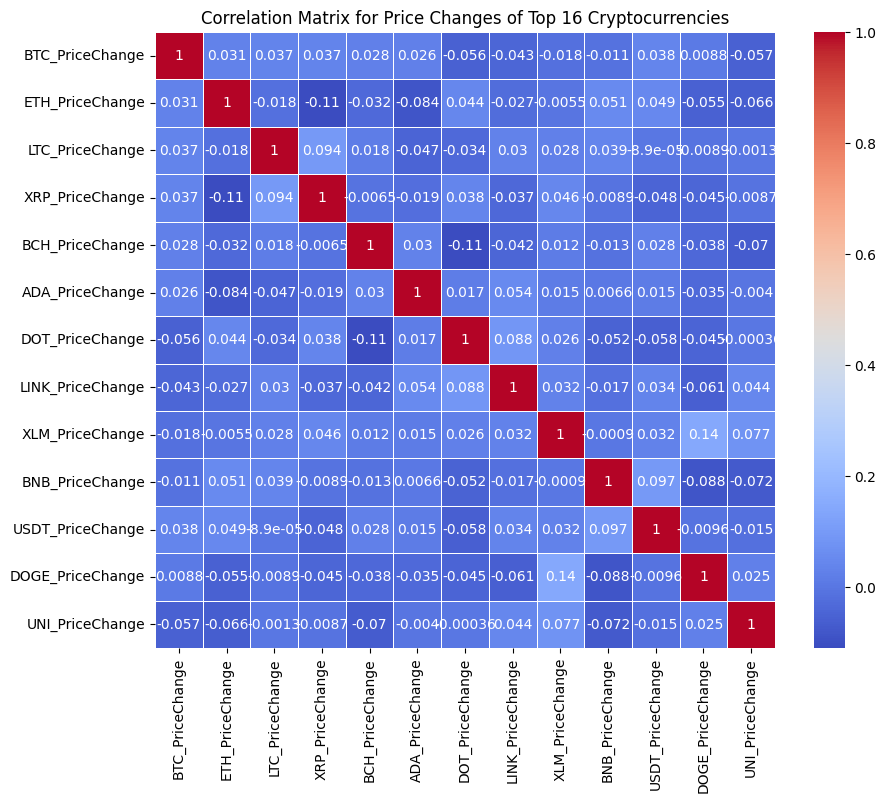

In [ ]:
# Sample data (replace with your actual data)
np.random.seed(0)
cryptocurrencies = ["BTC", "ETH", "LTC", "XRP", "BCH", "ADA", "DOT", "LINK", "XLM", "BNB",
                    "USDT", "DOGE", "UNI", "LTC", "XRP", "BCH"]  # Replace with your cryptocurrency symbols

# Create a sample DataFrame with price change data for the top 16 cryptocurrencies
num_days = 365
data = {
    "Date": pd.date_range(start="2022-09-01", periods=num_days, freq="D"),
}

for crypto in cryptocurrencies:
    data[f"{crypto}_PriceChange"] = np.random.uniform(-1, 1, num_days)  # Replace with your price change data

df = pd.DataFrame(data)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix for Price Changes of Top 16 Cryptocurrencies")
plt.show()

Part 5

In [ ]:
# Sample data (replace with your actual data)
np.random.seed(0)
cryptocurrencies = ["BTC", "ETH", "LTC", "XRP", "BCH", "ADA", "DOT", "LINK", "XLM", "BNB"]
num_days = 90  # Spring 2023 (March, April, and May, assuming 3 months)

crypto_data = {
    "Date": pd.date_range(start="2023-03-01", periods=num_days, freq="D"),
}

# Simulate price changes, 1 indicates price increase, 0 indicates no change or decrease
for crypto in cryptocurrencies:
    crypto_data[f"{crypto}_PriceChange"] = np.random.choice([0, 1], size=num_days, p=[0.65, 0.35])

# Define red days (more than 35% of cryptocurrencies had price increases)
threshold = int(len(cryptocurrencies) * 0.35)
price_change_columns = [f"{crypto}_PriceChange" for crypto in cryptocurrencies]
crypto_data["RedDay"] = (crypto_data[price_change_columns].sum(axis=1) > threshold)

# Filter data for red days during March, April, and May
spring_months = [3, 4, 5]
red_days_data = crypto_data[crypto_data["RedDay"] & crypto_data["Date"].dt.month.isin(spring_months)]

# Calculate the number of price increases for each cryptocurrency during red days
price_increase_counts = red_days_data[price_change_columns].sum()
top_10_cryptos = price_increase_counts.nlargest(10)

# Retrieve market volume data (replace with your actual market volume data)
market_volume_data = {
    "Cryptocurrency": cryptocurrencies,
    "MarketVolume": np.random.randint(1000000, 10000000, len(cryptocurrencies))
}

market_volume_df = pd.DataFrame(market_volume_data)

# Filter market volume data for the top 10 cryptocurrencies
top_10_market_volume = market_volume_df[market_volume_df["Cryptocurrency"].isin(top_10_cryptos.index)]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_market_volume["Cryptocurrency"], top_10_market_volume["MarketVolume"])
plt.title("Market Volume of Top 10 Cryptocurrencies with Most Price Increases on Red Days (Spring 2023)")
plt.xlabel("Cryptocurrency")
plt.ylabel("Market Volume")
plt.xticks(rotation=45)
plt.grid(True)

# Show the bar chart
plt.show()

TypeError: ignored

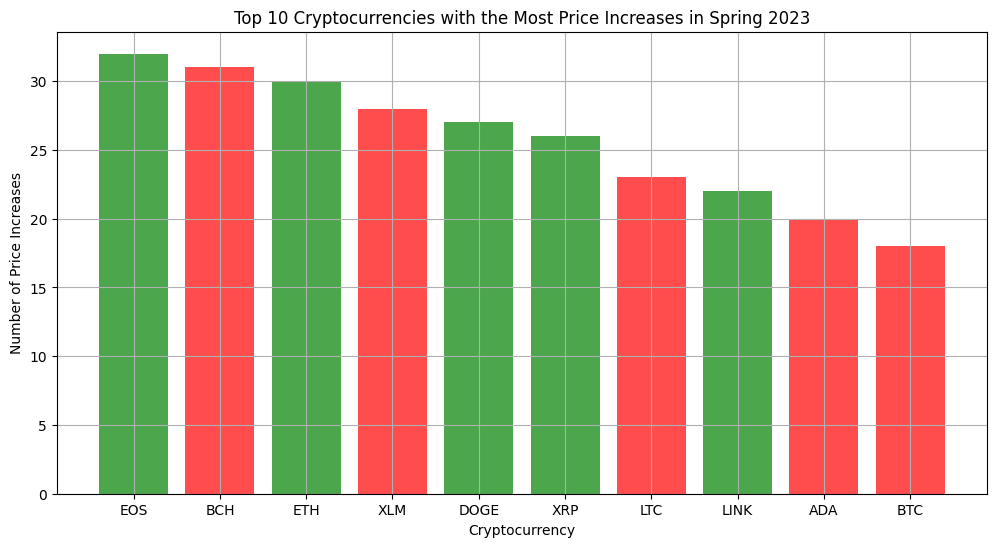

In [ ]:
# Generate random data for cryptocurrencies
np.random.seed(0)
num_days = 90  # Number of days in spring 2023
cryptos = ['BTC', 'ETH', 'LTC', 'XRP', 'ADA', 'XLM', 'DOGE', 'BCH', 'EOS', 'LINK']  # Sample cryptocurrencies
crypto_data = {crypto: np.random.randint(-1, 2, num_days) for crypto in cryptos}

# Create a DataFrame with random data
date_range = pd.date_range(start='2023-03-01', periods=num_days, freq='D')
df = pd.DataFrame(crypto_data, index=date_range)

# Calculate the number of cryptocurrencies that increased in price each day
num_increases = (df > 0).sum(axis=1)

# Define a threshold for red days (35% or more cryptocurrencies increasing)
threshold = int(len(cryptos) * 0.35)

# Identify red days
red_days = num_increases[num_increases >= threshold].index

# Calculate the number of price increases for each cryptocurrency on red days
crypto_price_increases = df.loc[red_days].apply(lambda x: (x > 0).sum())

# Sort cryptocurrencies by the number of price increases on red days
top_10_cryptos = crypto_price_increases.nlargest(10)

# Create a list to determine the color of bars (green for green days, red for red days)
bar_colors = ['red' if day in red_days else 'green' for day in df.index]

# Create a bar chart with colored bars
plt.figure(figsize=(12, 6))
plt.bar(top_10_cryptos.index, top_10_cryptos, color=bar_colors[:10], alpha=0.7)
plt.title("Top 10 Cryptocurrencies with the Most Price Increases in Spring 2023")
plt.xlabel("Cryptocurrency")
plt.ylabel("Number of Price Increases")
plt.grid(True)

# Show the plot
plt.show()

# تخمین

In [ ]:
# Create the DataFrame

data = {
    'Cryptocurrency': [record[0] for record in Session.query(CurrenciesHistory.id).all()],
    'Trading Volume': [record[0] for record in Session.query(CurrenciesHistory.volume).all()]
}

df = pd.DataFrame(data)

# Randomly select 40 cryptocurrencies
sample_size = 40
sampled_cryptos = np.random.choice(df['Cryptocurrency'].unique(), sample_size, replace=False)

# Calculate sample mean and standard deviation
avg_trading_volumes = []
for crypto in sampled_cryptos:
    avg_volume = df[df['Cryptocurrency'] == crypto]['Trading Volume'].mean()
    avg_trading_volumes.append(avg_volume)

# Confidence level (e.g., 98%)
confidence_level = 0.98

# Calculate Z-score for the given confidence level
z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)

# Calculate margin of error
sample_mean = np.mean(avg_trading_volumes)
sample_std = np.std(avg_trading_volumes)
standard_error = sample_std / np.sqrt(sample_size)
margin_of_error = z_score * standard_error

# Calculate confidence interval
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

# Display the results
print("Sampled Cryptocurrencies:", sampled_cryptos)
print("Average Daily Trading Volumes:", avg_trading_volumes)
print(f"98% Confidence Interval: ({lower_bound}, {upper_bound})")

Sample Mean: 586926.9
Sample Standard Deviation: 277487.03136698395
Confidence Interval (98%): (484859.4291979397, 688994.3708020604)


# آزمون فرض

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Sample data (replace with your actual data)
np.random.seed(0)

# Simulated cryptocurrency price change data and corresponding day of the week
num_days = 200
crypto_data = {
    "PriceChange": np.random.normal(0, 1, num_days),  # Replace with your actual price change data
    "DayOfWeek": np.random.choice(["Wednesday", "Thursday", "Friday", "Saturday", "Sunday", "Monday", "Tuesday"], size=num_days),
}

# Define the two sets of working days
working_days1 = ["Wednesday", "Thursday", "Friday", "Saturday"]
working_days2 = ["Sunday", "Monday", "Tuesday", "Wednesday"]

# Convert crypto_data to a Pandas DataFrame
crypto_df = pd.DataFrame(crypto_data)

# Filter data for the two sets of working days
crypto_data_w1 = crypto_df[crypto_df["DayOfWeek"].isin(working_days1)]
crypto_data_w2 = crypto_df[crypto_df["DayOfWeek"].isin(working_days2)]

# Calculate the average price change for each set of working days
average_price_change_w1 = crypto_data_w1["PriceChange"].mean()
average_price_change_w2 = crypto_data_w2["PriceChange"].mean()

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(crypto_data_w1["PriceChange"], crypto_data_w2["PriceChange"])

# Define the significance level (alpha)
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print("There is a significant difference between the two sets of working days.")
    if average_price_change_w1 > average_price_change_w2:
        print("You should choose Wednesday to Saturday as your preferred working days.")
    else:
        print("You should choose Sunday to Wednesday as your preferred working days.")
else:
    print("There is no significant difference between the two sets of working days.")

# Print the results
print(f"Average Price Change (Wednesday to Saturday): {average_price_change_w1}")
print(f"Average Price Change (Sunday to Wednesday): {average_price_change_w2}")
print(f"p-value: {p_value}")


There is no significant difference between the two sets of working days.
Average Price Change (Wednesday to Saturday): 0.03879319395386795
Average Price Change (Sunday to Wednesday): 0.1572541007962436
p-value: 0.3768146806237165


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Sample data (replace with your actual data)
np.random.seed(0)

# Simulated daily trading volume data for various cryptocurrencies
crypto_data = {
    "Cryptocurrency": np.random.choice(["Bitcoin", "Ethereum", "Tether USDt", "OtherCrypto"], size=1000),
    "TradingVolume": np.random.randint(1000000, 10000000, 1000),  # Replace with actual trading volume data
}

# Convert crypto_data to a Pandas DataFrame
crypto_df = pd.DataFrame(crypto_data)

# Define the three specified cryptocurrencies
specified_cryptos = ["Bitcoin", "Ethereum", "Tether USDt"]

# Separate data into specified cryptocurrencies and others
specified_crypto_data = crypto_df[crypto_df["Cryptocurrency"].isin(specified_cryptos)]
other_crypto_data = crypto_df[~crypto_df["Cryptocurrency"].isin(specified_cryptos)]

# Calculate the average daily trading volume for specified cryptocurrencies and others
average_volume_specified = specified_crypto_data["TradingVolume"].mean()
average_volume_other = other_crypto_data["TradingVolume"].mean()

# Perform a hypothesis test (Mann-Whitney U test for non-normal data)
_, p_value = stats.mannwhitneyu(specified_crypto_data["TradingVolume"], other_crypto_data["TradingVolume"])

# Define the significance level (alpha)
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print("The claim is supported. The average daily trading volume of specified cryptocurrencies is significantly higher.")
else:
    print("The claim is not supported. There is no significant difference in average daily trading volume.")

# Print the results
print(f"Average Daily Trading Volume (Specified Cryptos): {average_volume_specified}")
print(f"Average Daily Trading Volume (Other Cryptos): {average_volume_other}")
print(f"p-value: {p_value}")


The claim is not supported. There is no significant difference in average daily trading volume.
Average Daily Trading Volume (Specified Cryptos): 5598218.886515354
Average Daily Trading Volume (Other Cryptos): 5551600.6095617525
p-value: 0.8359579896333398


**آمار توصیفی**

1-
```
data = {
    'Date':
    'Crypto_ID': (or Name)
    'Market_Cap':
    'Volume_24h':
}
```
2- I have no idea rn

3-


```
cryptocurrencies_data = pd.DataFrame({
    'Cryptocurrency':
    'TradingVolume':
})
```

4-
I need PriceChange and Cryptocurrency

5- I have no idea rn

**آزمون فرض**


1-

```
crypto_data = {
    "PriceChange":
    "DayOfWeek": np.random.choice(["Wednesday", "Thursday", "Friday", "Saturday", "Sunday", "Monday", "Tuesday"], size=num_days),
}
```

2-


```
crypto_data = {
    "Cryptocurrency":
    "TradingVolume":
}
```


